### 선형회귀기반 분류 알고리즘 학습 - LogisticRegression + 교차검증

- 이진분류 및 다중분류 가능
- 분류지만 선형회귀식기반의 알고리즘이라서 Regresion

[1] 모듈 로딩 및 데이터 준비 <hr>

In [454]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

[1] 데이터 준비 및 확인

In [455]:
## 데이터 준비
filename = '../data/iris.csv'

In [456]:
## 데이터 로딩
irisDF = pd.read_csv(filename)
irisDF

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [457]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [458]:
irisDF.head(101)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor
99,5.7,2.8,4.1,1.3,Versicolor


[2] 데이터 확인 <hr>

- 2개 품종만 추출

In [459]:
## 품종 컬럼의 고유값 확인
irisDF.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [460]:
## boolean Index 사용해서 2개 품종 데이터 추출 ('Versicolor' 제외)
dataDF1 = irisDF[irisDF.variety != 'Versicolor'].copy()
dataDF1.shape

(100, 5)

In [461]:
## boolean Index 사용해서 2개 품종 데이터 추출 ('Setosa' 제외)
dataDF2 = irisDF[irisDF.variety != 'Setosa'].copy()
dataDF2.shape

(100, 5)

- 3개 품종 모두 선택

In [462]:
irisDF
irisDF.shape

(150, 5)

- 2개 품종 식별 가능한 피쳐 선택

In [463]:
dataDF1[dataDF1['variety'] == 'Setosa']['petal.length']

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
11    1.6
12    1.4
13    1.1
14    1.2
15    1.5
16    1.3
17    1.4
18    1.7
19    1.5
20    1.7
21    1.5
22    1.0
23    1.7
24    1.9
25    1.6
26    1.6
27    1.5
28    1.4
29    1.6
30    1.6
31    1.5
32    1.5
33    1.4
34    1.5
35    1.2
36    1.3
37    1.4
38    1.3
39    1.5
40    1.3
41    1.3
42    1.3
43    1.6
44    1.9
45    1.4
46    1.6
47    1.4
48    1.5
49    1.4
Name: petal.length, dtype: float64

In [464]:
SETO1 = dataDF1['variety'] == 'Setosa'
VIRG1 = dataDF1['variety'] == 'Virginica'

In [465]:
dataDF1[SETO1]['petal.length']
dataDF1[VIRG1]['petal.length']

100    6.0
101    5.1
102    5.9
103    5.6
104    5.8
105    6.6
106    4.5
107    6.3
108    5.8
109    6.1
110    5.1
111    5.3
112    5.5
113    5.0
114    5.1
115    5.3
116    5.5
117    6.7
118    6.9
119    5.0
120    5.7
121    4.9
122    6.7
123    4.9
124    5.7
125    6.0
126    4.8
127    4.9
128    5.6
129    5.8
130    6.1
131    6.4
132    5.6
133    5.1
134    5.6
135    6.1
136    5.6
137    5.5
138    4.8
139    5.4
140    5.6
141    5.1
142    5.1
143    5.9
144    5.7
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, dtype: float64

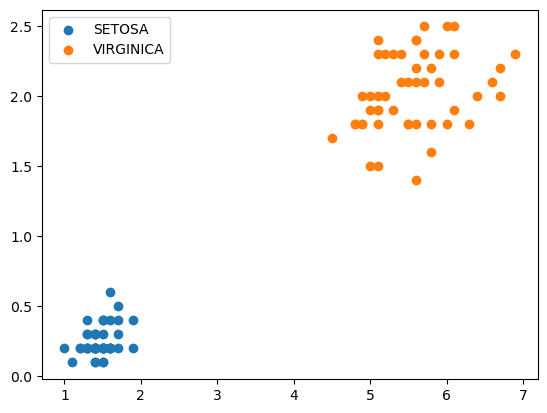

In [466]:
plt.scatter(dataDF1[SETO1]['petal.length'], dataDF1[SETO1]['petal.width'], label='SETOSA')
plt.scatter(dataDF1[VIRG1]['petal.length'], dataDF1[VIRG1]['petal.width'], label='VIRGINICA')

plt.legend()
plt.show()

In [467]:
VESI2 = dataDF2['variety'] == 'Versicolor'
VIRG2 = dataDF2['variety'] == 'Virginica'

In [468]:
dataDF2[VESI2]['petal.length']

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal.length, dtype: float64

In [469]:
dataDF2[VIRG2]['petal.length']

100    6.0
101    5.1
102    5.9
103    5.6
104    5.8
105    6.6
106    4.5
107    6.3
108    5.8
109    6.1
110    5.1
111    5.3
112    5.5
113    5.0
114    5.1
115    5.3
116    5.5
117    6.7
118    6.9
119    5.0
120    5.7
121    4.9
122    6.7
123    4.9
124    5.7
125    6.0
126    4.8
127    4.9
128    5.6
129    5.8
130    6.1
131    6.4
132    5.6
133    5.1
134    5.6
135    6.1
136    5.6
137    5.5
138    4.8
139    5.4
140    5.6
141    5.1
142    5.1
143    5.9
144    5.7
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, dtype: float64

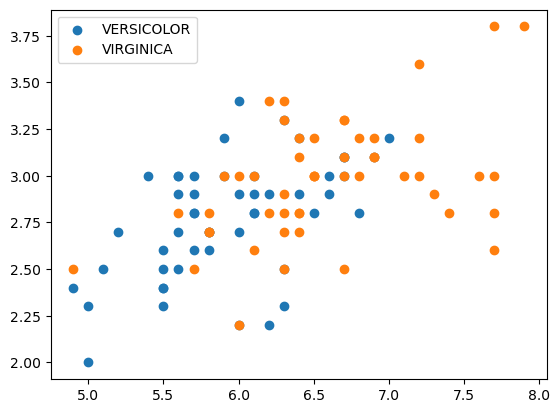

In [470]:
plt.scatter(dataDF2[VESI2]['sepal.length'], dataDF2[VESI2]['sepal.width'], label='VERSICOLOR')
plt.scatter(dataDF2[VIRG2]['sepal.length'], dataDF2[VIRG2]['sepal.width'], label='VIRGINICA')

plt.legend()
plt.show()

-> 식별하기 애매함

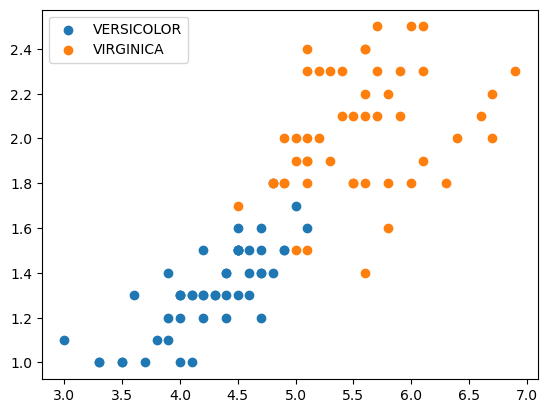

In [471]:
plt.scatter(dataDF2[VESI2]['petal.length'], dataDF2[VESI2]['petal.width'], label='VERSICOLOR')
plt.scatter(dataDF2[VIRG2]['petal.length'], dataDF2[VIRG2]['petal.width'], label='VIRGINICA')

plt.legend()
plt.show()

In [472]:
SETO = irisDF['variety'] == 'Setosa'
VESI = irisDF['variety'] == 'Versicolor'
VIRG = irisDF['variety'] == 'Virginica'

In [473]:
irisDF[SETO]['petal.length']

0     1.4
1     1.4
2     1.3
3     1.5
4     1.4
5     1.7
6     1.4
7     1.5
8     1.4
9     1.5
10    1.5
11    1.6
12    1.4
13    1.1
14    1.2
15    1.5
16    1.3
17    1.4
18    1.7
19    1.5
20    1.7
21    1.5
22    1.0
23    1.7
24    1.9
25    1.6
26    1.6
27    1.5
28    1.4
29    1.6
30    1.6
31    1.5
32    1.5
33    1.4
34    1.5
35    1.2
36    1.3
37    1.4
38    1.3
39    1.5
40    1.3
41    1.3
42    1.3
43    1.6
44    1.9
45    1.4
46    1.6
47    1.4
48    1.5
49    1.4
Name: petal.length, dtype: float64

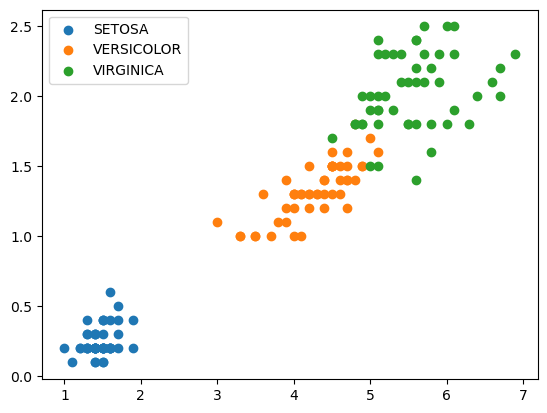

In [474]:
plt.scatter(irisDF[SETO]['petal.length'], irisDF[SETO]['petal.width'], label='SETOSA')
plt.scatter(irisDF[VESI]['petal.length'], irisDF[VESI]['petal.width'], label='VERSICOLOR')
plt.scatter(irisDF[VIRG]['petal.length'], irisDF[VIRG]['petal.width'], label='VIRGINICA')

plt.legend()
plt.show()

- 꽃잎의 길이와 너비(petal.length, petal.width) 특성만 추출

In [475]:
dataDF1.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [476]:
dataDF1=dataDF1[dataDF1.columns[2:]].copy()

In [477]:
dataDF1.shape

(100, 3)

In [478]:
dataDF1.head(5)

,petal.length,petal.width,variety
0,1.4,0.2,Setosa
1,1.4,0.2,Setosa
2,1.3,0.2,Setosa
3,1.5,0.2,Setosa
4,1.4,0.2,Setosa


In [479]:
## - 품종컬럼 문자열 ==> 수치형태 변환한 컬럼 추가
pd.set_option('future.no_silent_downcasting', True)
labelToNum={'Setosa' : 0, 'Virginica':1}
dataDF1['variety_no']=dataDF1.variety.replace(labelToNum )

In [480]:
dataDF1.head(3)

,petal.length,petal.width,variety,variety_no
0,1.4,0.2,Setosa,0
1,1.4,0.2,Setosa,0
2,1.3,0.2,Setosa,0


In [481]:
dataDF1.corr(numeric_only=True)

,petal.length,petal.width
petal.length,1.000000,0.969824
petal.width,0.969824,1.000000


In [482]:
dataDF2.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [483]:
dataDF2=dataDF2[dataDF2.columns[2:]].copy()

In [484]:
dataDF2.shape

(100, 3)

In [485]:
## - 품종컬럼 문자열 ==> 수치형태 변환한 컬럼 추가
pd.set_option('future.no_silent_downcasting', True)
labelToNum={'Versicolor' : 0, 'Virginica':1}
dataDF2['variety_no']=dataDF2.variety.replace(labelToNum )

In [486]:
dataDF2.head(3)

,petal.length,petal.width,variety,variety_no
50,4.7,1.4,Versicolor,0
51,4.5,1.5,Versicolor,0
52,4.9,1.5,Versicolor,0


In [487]:
dataDF2.corr(numeric_only=True)

,petal.length,petal.width
petal.length,1.000000,0.823348
petal.width,0.823348,1.000000


In [488]:
irisDF.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [489]:
irisDF=irisDF[irisDF.columns[2:]].copy()

In [490]:
irisDF.shape

(150, 3)

In [491]:
## - 품종컬럼 문자열 ==> 수치형태 변환한 컬럼 추가
pd.set_option('future.no_silent_downcasting', True)
labelToNum={'Setosa':0, 'Versicolor' : 1, 'Virginica':2}
irisDF['variety_no']=irisDF.variety.replace(labelToNum )

In [492]:
irisDF.head(3)

,petal.length,petal.width,variety,variety_no
0,1.4,0.2,Setosa,0
1,1.4,0.2,Setosa,0
2,1.3,0.2,Setosa,0


In [493]:
irisDF.corr(numeric_only=True)

,petal.length,petal.width
petal.length,1.000000,0.962865
petal.width,0.962865,1.000000


#### [2] 데이터 가공

In [494]:
featureDF1 = dataDF1[dataDF1.columns[:2]]
classDF1 = dataDF1.variety_no

In [495]:
# object 타입 ==> int 타입으로 변환
classDF1=classDF1.astype('int')
classDF1

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: variety_no, Length: 100, dtype: int64

In [496]:
print(f'featureDF1 : {featureDF1.shape}  classDF1 : {classDF1.shape}')

featureDF1 : (100, 2)  classDF1 : (100,)


In [497]:
featureDF2 = dataDF2[dataDF2.columns[:2]]
classDF2 = dataDF2.variety_no

In [498]:
# object 타입 ==> int 타입으로 변환
classDF2=classDF2.astype('int')
classDF2

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: variety_no, Length: 100, dtype: int64

In [499]:
print(f'featureDF2 : {featureDF2.shape}  classDF2 : {classDF2.shape}')

featureDF2 : (100, 2)  classDF2 : (100,)


In [500]:
featureDF = irisDF[irisDF.columns[:2]]
classDF = irisDF.variety_no

In [501]:
# object 타입 ==> int 타입으로 변환
classDF=classDF.astype('int')
classDF


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety_no, Length: 150, dtype: int64

In [502]:
print(f'featureDF : {featureDF.shape}  classDF2 : {classDF.shape}')

featureDF : (150, 2)  classDF2 : (150,)


- 훈련용/테스트용 분리

In [503]:
## - 분류 시에는 훈련용/테스트용에 동일한 비율로 타겟이 배분
## - stratify 매개변수 : 타겟 데이터셋의 클래스/라벨 비율에 맞게 학습용/테스트용 분리
train_X1, test_X1, train_y1, test_y1 = train_test_split(featureDF1,classDF1,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=classDF1)

In [504]:
print(f'[TRAIN] train_X1 : {train_X1.shape} train_y1 : {train_y1.shape}')
print(f'[TEST] test_X1 : {test_X1.shape} test_y1 : {test_y1.shape}')

[TRAIN] train_X1 : (80, 2) train_y1 : (80,)
[TEST] test_X1 : (20, 2) test_y1 : (20,)


In [505]:
## 데이터셋별로 클래스 갯수 확인
test_y1.value_counts(), train_y1.value_counts()

(variety_no
 1    10
 0    10
 Name: count, dtype: int64,
 variety_no
 1    40
 0    40
 Name: count, dtype: int64)

In [506]:
## - 분류 시에는 훈련용/테스트용에 동일한 비율로 타겟이 배분
## - stratify 매개변수 : 타겟 데이터셋의 클래스/라벨 비율에 맞게 학습용/테스트용 분리
train_X2, test_X2, train_y2, test_y2 = train_test_split(featureDF2,classDF2,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=classDF2)

In [507]:
print(f'[TRAIN] train_X2 : {train_X2.shape} train_y2 : {train_y2.shape}')
print(f'[TEST] test_X2 : {test_X2.shape} test_y2 : {test_y2.shape}')

[TRAIN] train_X2 : (80, 2) train_y2 : (80,)
[TEST] test_X2 : (20, 2) test_y2 : (20,)


In [508]:
## 데이터셋별로 클래스 갯수 확인
test_y2.value_counts(), train_y2.value_counts()

(variety_no
 1    10
 0    10
 Name: count, dtype: int64,
 variety_no
 1    40
 0    40
 Name: count, dtype: int64)

In [509]:
## - 분류 시에는 훈련용/테스트용에 동일한 비율로 타겟이 배분
## - stratify 매개변수 : 타겟 데이터셋의 클래스/라벨 비율에 맞게 학습용/테스트용 분리
train_X, test_X, train_y, test_y = train_test_split(featureDF, classDF,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=classDF)

In [510]:
print(f'[TRAIN] train_X : {train_X.shape} train_y : {train_y.shape}')
print(f'[TEST] test_X : {test_X.shape} test_y : {test_y.shape}')

[TRAIN] train_X : (120, 2) train_y : (120,)
[TEST] test_X : (30, 2) test_y : (30,)


In [511]:
## 데이터셋별로 클래스 갯수 확인
test_y.value_counts(), train_y.value_counts()

(variety_no
 2    10
 0    10
 1    10
 Name: count, dtype: int64,
 variety_no
 2    40
 0    40
 1    40
 Name: count, dtype: int64)

- 특성/피쳐 2개에 대한 스케일링 진행 ==> 피쳐의 값의 범위 일치

In [512]:
  from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [513]:
## StandardScaler : 평균 0, 표준편차 1 즉, 정규분포 따르도록 스케일링
## 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행함
scaler1 = StandardScaler()

scaler1.fit(train_X1)

StandardScaler()

In [514]:
## fit() 후에 설정되는 파라미터들 ==> 모델 파라미터
print(scaler1.var_, scaler1.mean_)

[4.4159       0.8249359375] [3.51    1.12625]


In [515]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X1 = scaler1.transform(train_X1)
test_scaled_X1 = scaler1.transform(test_X1)

In [516]:
## StandardScaler : 평균 0, 표준편차 1 즉, 정규분포 따르도록 스케일링
## 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행함
scaler2 = StandardScaler()

scaler2.fit(train_X2)

StandardScaler()

In [517]:
## fit() 후에 설정되는 파라미터들 ==> 모델 파라미터
print(scaler2.var_, scaler2.mean_)

[0.70235      0.1771484375] [4.92    1.66875]


In [518]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X2 = scaler2.transform(train_X2)
test_scaled_X2 = scaler2.transform(test_X2)

In [519]:
## StandardScaler : 평균 0, 표준편차 1 즉, 정규분포 따르도록 스케일링
## 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행함
scaler = StandardScaler()

scaler.fit(train_X)

StandardScaler()

In [520]:
## fit() 후에 설정되는 파라미터들 ==> 모델 파라미터
print(scaler.var_, scaler.mean_)

[3.1731       0.5908604167] [3.78   1.2075]


In [521]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(train_X)
test_scaled_X = scaler.transform(test_X)

#### [3] 학습 
- 메인학습 : 지도학습 - 분류
- 세부학습 : 선형모델 로지스틱회귀

In [522]:
# 학습모델 객체
logR1=LogisticRegression()

In [523]:
# 학습 진행 ==> 훈련용 데이터 진행 fit(2D, 1D)
logR1.fit(train_scaled_X1, train_y1)

LogisticRegression()

In [524]:
# 학습 진행 후 설정되는 매개변수/파라미터 ===> 모델 파라미터 
# 파라메타명_
logR1.classes_

array([0, 1])

In [525]:
## 피쳐 갯수 만큼 존재함. 피쳐*coef_
logR1.coef_

array([[1.9694242632, 1.8863199691]])

In [526]:
## 바이어스/절편
logR1.intercept_

array([0.158413438])

In [527]:
# 학습모델 객체
logR2=LogisticRegression()

In [528]:
# 학습 진행 ==> 훈련용 데이터 진행 fit(2D, 1D)
logR2.fit(train_scaled_X2, train_y2)

LogisticRegression()

In [529]:
# 학습 진행 후 설정되는 매개변수/파라미터 ===> 모델 파라미터 
# 파라메타명_
logR2.classes_

array([0, 1])

In [530]:
## 피쳐 갯수 만큼 존재함. 피쳐*coef_
logR2.coef_

array([[1.9708177705, 2.0482838785]])

In [531]:
## 바이어스/절편
logR2.intercept_

array([0.1071768208])

In [532]:
# 학습모델 객체
logR=LogisticRegression()

In [533]:
# 학습 진행 ==> 훈련용 데이터 진행 fit(2D, 1D)
logR.fit(train_scaled_X, train_y)

LogisticRegression()

In [534]:
# 학습 진행 후 설정되는 매개변수/파라미터 ===> 모델 파라미터 
# 파라메타명_
logR.classes_

array([0, 1, 2])

In [535]:
## 피쳐 갯수 만큼 존재함. 피쳐*coef_
logR.coef_

array([[-2.4294909312, -2.1004826563],
       [ 0.1885777371, -0.4340649708],
       [ 2.240913194 ,  2.5345476271]])

In [536]:
## 바이어스/절편
logR.intercept_

array([-0.5657192112,  1.8248260165, -1.2591068053])

#### [4] 성능평가
- 이유 : 모델이 제대로 잘 만들어 졌는지 확인
- 과대적합/과소적합 체크
    * 과대적합/과적합/오버피팅(Overfitting) : 훈련 점수 > 테스트 점수
    * 과소적합/언더피팅(Underfitting) : 훈련과 테스트 점수 모두 낮음
    * 최적적합 : 훈련 점수와 테스트 점수 비슷 높은 점수 

- 점수 : 정확도(accuary_score)

In [537]:
train1_score=logR1.score(train_scaled_X1, train_y1)
test1_score= logR1.score(test_scaled_X1, test_y1)

In [538]:
print(f'train1_score : {train1_score}, test1_score  : {test1_score}')

train1_score : 1.0, test1_score  : 1.0


In [539]:
train2_score=logR2.score(train_scaled_X2, train_y2)
test2_score= logR2.score(test_scaled_X2, test_y2)

In [540]:
print(f'train2_score : {train2_score}, test2_score  : {test2_score}')

train2_score : 0.925, test2_score  : 1.0


In [541]:
train_score=logR.score(train_scaled_X, train_y)
test_score= logR.score(test_scaled_X, test_y)

In [542]:
print(f'train_score : {train_score}, test_score  : {test_score}')

train_score : 0.95, test_score  : 1.0


- 분류용 성능지표 ==>  sklearn.metrics 모듈
<pre>
	* 정밀도(precision) : 모델(예측값)기준에서 양성/Positive를 제대로 예측한 비율  
	* 재현율(Recall) : 정답기준에서 양성/Positive를 제대로 예측한 비율  
	* F1-score : 정밀도와 재현율의 조합한 계산법 <== 일반적인 경우 대부분 분류 성능지표로 사용  
	* 정확도(Accuracy) : 정답을 맞춘 비율 <= 불균형 데이터셋에 신뢰성 떨어짐  
	* 오차행렬(COnfusion_matrix) : 2진 분류에서 정답과 예측에 대한 평가표

In [543]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [544]:
# 테스트 데이터기반으로 예측값 추출
y1_pred=logR1.predict(test_scaled_X1)

y1_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [545]:
# 테스트 데이터기반으로 예측값 추출
y2_pred=logR2.predict(test_scaled_X2)

y2_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [546]:
# 테스트 데이터기반으로 예측값 추출
y_pred=logR.predict(test_scaled_X)

y_pred

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 2])

- [정밀도 점수] 

In [547]:
precision_score(test_y1, y1_pred)

1.0

In [548]:
recall_score(test_y1, y1_pred, pos_label='Virginica', average='macro')

c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1618: UserWarning: Note that pos_label (set to 'Virginica') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

In [549]:
f1_score(test_y1, y1_pred, pos_label='Virginica', average='macro')

c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1618: UserWarning: Note that pos_label (set to 'Virginica') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

In [550]:
confusion_matrix(test_y1, y1_pred)

array([[10,  0],
       [ 0, 10]])

In [551]:
print( classification_report(test_y1, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [552]:
precision_score(test_y2, y2_pred)

1.0

In [553]:
recall_score(test_y2, y2_pred, pos_label='Virginica', average='macro')

c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1618: UserWarning: Note that pos_label (set to 'Virginica') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

In [554]:
f1_score(test_y2, y2_pred, pos_label='Virginica', average='macro')

c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1618: UserWarning: Note that pos_label (set to 'Virginica') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

In [555]:
confusion_matrix(test_y2, y2_pred)

array([[10,  0],
       [ 0, 10]])

In [556]:
print( classification_report(test_y2, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [557]:
precision_score(test_y, y_pred, average="macro")

1.0

In [558]:
precision_score(test_y, y_pred, average="weighted")

1.0

In [559]:
recall_score(test_y, y_pred, pos_label='Virginica', average='macro')

c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1618: UserWarning: Note that pos_label (set to 'Virginica') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

In [560]:
f1_score(test_y, y_pred, pos_label='Virginica', average='macro')

c:\Users\KDP-35\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\metrics\_classification.py:1618: UserWarning: Note that pos_label (set to 'Virginica') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


1.0

In [561]:
confusion_matrix(test_y, y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]])

In [562]:
print( classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



- 오차확인 : 손실/비용함수 => 알고리즘 마다 다름 log_loss()

In [563]:
from sklearn.metrics import log_loss

In [564]:
np.set_printoptions(precision=10, suppress=True)

In [565]:
## y=1일 때 오차, y=0일 때 오차 계산 => 손실/비용계산
loss1 = log_loss(test_y1, y1_pred)

print(f'loss1: {loss1 :.6f}')

loss1: 0.000000


In [566]:
## y=1일 때 오차, y=0일 때 오차 계산 => 손실/비용계산
loss2 = log_loss(test_y2, y2_pred)

print(f'loss2: {loss2 :.6f}')

loss2: 0.000000


In [586]:
import numpy as np
from scipy.special import softmax

# 1차원 배열(y_pred)인지 확인 후 2차원으로 변환
if y_pred.ndim == 1:
    y_pred = y_pred.reshape(-1, 1)  # (N,) → (N, 1)

# softmax 적용
y_pred_proba = softmax(y_pred, axis=1)

print(y_pred_proba)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


### 교차검증 ---------------------------------------------------------

- 데이터부족에 따른 과대적합/과적합/오버피팅을 해결하기 위한 방안
- 기본 데이터 분리 갯수 => 5 (지금껏 해당 기능을 사용해 보니 가장 성능이 좋았음)
- 데이터 구성
    * 입력 : 훈련데이터 , 타겟데이터
    * 분리 : 훈련데이터 ==> n등분(기:5)
        - 학습 완료 후 현재 모델에 대한 검사 진행 ==> 검증데이터필요
        - 1/n : 검증데이터로 사용
        - n-1/n : 훈련데이터로 사용
        - [중요] 검증데이터는 매번 변경
            * 검 훈 훈 훈 훈
            * 훈 검 훈 훈 훈
            * 훈 훈 검 훈 훈
            * 훈 훈 훈 검 훈
            * 훈 훈 훈 훈 검

In [ ]:
# 모듈 로딩 --------------------------------------------------
from sklearn.model_selection import cross_validate

In [ ]:
# 모델객체, 훈련데이터, 타겟데이터
result1= cross_validate(logR1, train_scaled_X1, train_y1)

In [ ]:
# 결과 result => dict 형태
for key, value in result1.items(): print(key, value)

fit_time [0.0039825439 0.0020084381 0.0020067692 0.0020081997 0.0029520988]
score_time [0.           0.0020084381 0.0020074844 0.           0.0009965897]
test_score [1. 1. 1. 1. 1.]


In [ ]:
# 모델객체, 훈련데이터, 타겟데이터 , 훈련결과, 최고의 모델 
result11= cross_validate(logR1, train_scaled_X1, train_y1, 
                        return_estimator=True, 
                        return_train_score=True)

In [ ]:
for key, value in result11.items(): print(key, value)

fit_time [0.0020008087 0.0019841194 0.0028145313 0.0019819736 0.0019989014]
score_time [0.           0.0009982586 0.           0.0010011196 0.          ]
estimator [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
test_score [1. 1. 1. 1. 1.]
train_score [1. 1. 1. 1. 1.]


In [ ]:
# test_score와 train_score 값 비교해서 과대적합/과적합/오버피팅이 되지 않은
# 가장 좋음 모델 선택 후 추출
best_estimator=result11['estimator'][2]

In [ ]:
featureDF1[:1]

,petal.length,petal.width
0,1.4,0.2


In [ ]:
new_data1 = pd.DataFrame([[1.4, 0.8]], columns=featureDF1.columns)
new_data_ = scaler1.transform(new_data1)

In [ ]:
best_estimator.predict(new_data_)

array([0])

In [ ]:
best_estimator.predict_proba(new_data_)

array([[0.9139246509, 0.0860753491]])

In [ ]:
# 모델객체, 훈련데이터, 타겟데이터
result2= cross_validate(logR2, train_scaled_X2, train_y2)

In [ ]:
# 결과 result => dict 형태
for key, value in result2.items(): print(key, value)

fit_time [0.0019981861 0.001999855  0.0020008087 0.0017030239 0.          ]
score_time [0.0010051727 0.0019960403 0.0010001659 0.0007214546 0.          ]
test_score [0.9375 0.875  1.     0.875  0.875 ]


In [ ]:
# 모델객체, 훈련데이터, 타겟데이터 , 훈련결과, 최고의 모델 
result21= cross_validate(logR2, train_scaled_X2, train_y2, 
                        return_estimator=True, 
                        return_train_score=True)

In [ ]:
for key, value in result21.items(): print(key, value)

fit_time [0.           0.           0.0086960793 0.0024988651 0.          ]
score_time [0. 0. 0. 0. 0.]
estimator [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
test_score [0.9375 0.875  1.     0.875  0.875 ]
train_score [0.921875 0.9375   0.90625  0.9375   0.9375  ]


In [ ]:
# test_score와 train_score 값 비교해서 과대적합/과적합/오버피팅이 되지 않은
# 가장 좋음 모델 선택 후 추출
best_estimator=result21['estimator'][2]

In [ ]:
featureDF2[:1]

,petal.length,petal.width
50,4.7,1.4


In [ ]:
new_data2 = pd.DataFrame([[4.7, 1.4]], columns=featureDF2.columns)
new_data_ = scaler1.transform(new_data2)

In [ ]:
best_estimator.predict(new_data_)

array([1])

In [ ]:
best_estimator.predict_proba(new_data_)

array([[0.159846218, 0.840153782]])

In [587]:
# 모델객체, 훈련데이터, 타겟데이터
result= cross_validate(logR, train_scaled_X, train_y)

In [588]:
# 결과 result => dict 형태
for key, value in result.items(): print(key, value)

fit_time [0.002985239  0.0020010471 0.0010006428 0.0056490898 0.0019135475]
score_time [0.0020017624 0.0009953976 0.           0.0010490417 0.0009908676]
test_score [1.           0.9583333333 1.           0.9166666667 0.875       ]


In [590]:
# 모델객체, 훈련데이터, 타겟데이터 , 훈련결과, 최고의 모델 
result02= cross_validate(logR, train_scaled_X, train_y, 
                        return_estimator=True, 
                        return_train_score=True)

In [591]:
for key, value in result02.items(): print(key, value)

fit_time [0.0029690266 0.0010373592 0.0040097237 0.0020141602 0.0024297237]
score_time [0.0011610985 0.           0.0009989738 0.0009982586 0.          ]
estimator [LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()]
test_score [1.           0.9583333333 1.           0.9166666667 0.875       ]
train_score [0.9270833333 0.9479166667 0.9375       0.9479166667 0.96875     ]


In [592]:
# test_score와 train_score 값 비교해서 과대적합/과적합/오버피팅이 되지 않은
# 가장 좋음 모델 선택 후 추출
best_estimator=result02['estimator'][2]

In [593]:
featureDF[:1]

,petal.length,petal.width
0,1.4,0.2


In [594]:
new_data = pd.DataFrame([[1.4, 0.2]], columns=featureDF.columns)
new_data_ = scaler1.transform(new_data)

In [595]:
best_estimator.predict(new_data_)

array([0])

In [596]:
best_estimator.predict_proba(new_data_)

array([[0.8639477209, 0.1359780393, 0.0000742397]])